# Continued Fractions

## Compressing and communicating phi

one of the very less know things about phi is that 

phi**2 - phi -1 = 0

continued fractions are basically consists of sums and reciprocals nested in mulitple layers. COntinued fraction can be finite, like the one above when divided by itself and substituted

continued fractions are basically represented as this

[1; 1,2,1,1,4,1,1,6,1,1,8...]

where the digit before semicolon are not repeated and the digit after the semicolon are repeated

steps for continued fractions program:
    
    find the small out of the 2 numbers to be divided
    append the quotient 
    switcharoo with % to swap the new big and new small
    

In [3]:
import math
def continued_fraction(x,y,length_tolerance):
    output = []
    big = max(x,y)
    small = min(x,y)
    while small>0 and len(output)<length_tolerance:
        quotient = math.floor(big/small)
        output.append(quotient)
        new_small = big%small
        big = small
        small = new_small
    return output

In [4]:
print(continued_fraction(105,33,10))

[3, 5, 2]


### For checking that the numbers above correctly represent the fraction provided

In [5]:
#The function works be getting number [3,5,2] and seeing that we get the repeateting float number that it should be as an output
#The argument is taking in a list as an argument and not a function
def get_number(continued_fraction):
    index = -1
    number = continued_fraction[index]
    
    while abs(index) < len(continued_fraction):
        next = continued_fraction[index - 1]
        number = 1/number + next
        index-=1
    return(number)

In [6]:
get_number([3,5,2])

3.1818181818181817

# From decimals to continuous fractions

as we know how the decimals to fractions look we will start by finding a which is the easiest to find

In [7]:
x = 1.4142135623730951
output = []
first_term = int(x)
leftover = x-int(x)
output.append(first_term)

# Now we will have to find a continued fraction for the leftover

In [9]:
# we will be repeating the process of taking a reciprocal of a decimal part and finding the integer to the left of the decimal part

next_term = math.floor(1/leftover)
leftover = 1/leftover - next_term
output.append(next_term)

In [10]:
output

[1, 2]

In [11]:
# Putting the whole repeateting process into a function we get

def continued_fraction_decimal(x,error_tolerance, length_tolerance):
    output = []
    first_term = int(x)
    leftover = x-int(x)
    output.append(first_term)
    error = leftover   #exiting the prgrm after we get close enough to the solution as the fractions are infinitely repeating
    while error > error_tolerance and len(output)<length_tolerance:
        next_term = math.floor(1/leftover)
        leftover = 1/leftover - next_term 
        output.append(next_term)
        error = abs(get_number(output) - x)
    return(output)

In [12]:
print(continued_fraction_decimal(1.4142135623730951,0.00001,100))

[1, 2, 2, 2, 2, 2, 2, 2]


# Square Roots

There is baiscally an algorithm that a claculator needs to use to get the output of getting sine values or root values since both of them have no concrete expressions to calculate easily from

# the babylonian algorithm

this algorithm is basically what we used to do for finding the root

suppose we need to find the sqroot of the number x. 

we will assume our best guess for the square root of a number x is y

if our guess is not exactly the root of x, we will want to guess again and we will want our next guess to take us closer to the tru value of x

this algorithm will provide a systematic way to improve out guesses until we converge no the right answer

steps will be as follows:
    
    1. Make a guess y, for the value of sqroot x
    2. calculate: z = x/y
    3. Find the average of z and y. This average will be the new value of y, or our new guess for the value of the square root of x
    4. Repeat the steps 2 ad 3 until y^2-x is sufficiently small

## Overall the babylon algorithm can combine all the four points mentioned above and can be represented in the following context

yn+1 = (yn + x/yn)/2

if y is an underestimate for the correct value of root x than the output z i.e. x**2/y**2 will be an overestimate

if y is an overestimate than z would be an underestimate

step 3 of babylon is to take average of 1 overestimate and one underestimate so the new estimate will be closer to the truth than whichever y or z was the worst guess. Eventually after many rounds of gradual improvement of our guesses, we arrive at the tru value of root x

# Square roots in python

babylonian is not hard to implement in python

In [3]:
def square_root(x,y,error_tolerance):
    our_error = error_tolerance * 2
    while(our_error>error_tolerance):
        z = x/y
        y = (y+z)/2
        our_error = y**2 - x
    return y

In [4]:
print(square_root(5,1,.000000000000001))

2.23606797749979


In [6]:
import math

In [7]:
print(math.sqrt(5))

2.23606797749979


# Random number generators

a computer can basically not generate random numbers and hence we have managed to only generate <b>sudo-random numbers 

## Linear congruential generators (LCGs)

the simplest

In [1]:
# for implementation simply choose n1, n2, n3 and then the LCG starts with this equation as follows

# next = (previous*n1*n2)*modn3

In [2]:
# As we know % is mod

def next_random(previous, n1, n2, n3):
    the_next = (previous*n1 + n2)%n3
    return(the_next)

The number of values which we will get unique looking like random before again generating the same number and pattern is known as the period of PRNG

In [3]:
def list_random(n1,n2,n3):
    output = [1]
    while len(output) <=n3:
        output.append(next_random(output[len(output) - 1],n1,n2,n3))
    return(output)

# Testing out whether the output is truly random - Diehard tests

### There are 12 diehard tests and each of the test evaluates the collection of random numbers in a different way.

the numbers which pass all these tests are deemed to be a very strong resemblance of true randomness

one of the test is the <b> the overlapping sums test

takes the sums of collection of consecutive numbers from the list and it should follow a pattern of bell curve

In [5]:
def overlappingsums(thelist, sumlength):
    lengthoflist = len(thelist)
    thelist.extend(thelist)
    output = []
    for n in range(0, lengthoflist):
        output.append(sum(thelist[n:(n+sumlength)]))
    return output

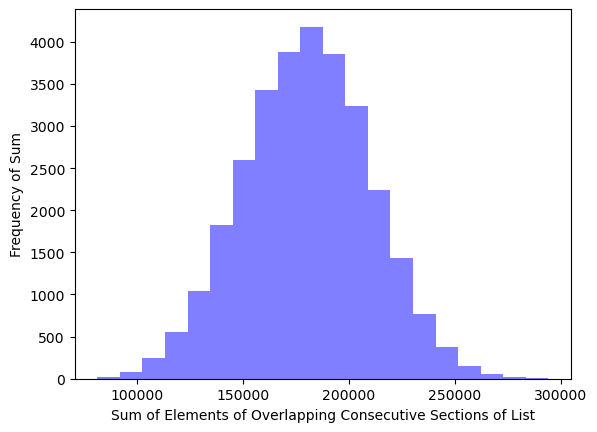

In [8]:
# Running the code on a new random as below

import matplotlib.pyplot as plt
overlap = overlappingsums(list_random(1111, 11111, 30007), 12)
plt.hist(overlap, 20, facecolor = 'blue', alpha = 0.5)
plt.xlabel('Sum of Elements of Overlapping Consecutive Sections of List')
plt.ylabel('Frequency of Sum')
plt.show()

If the graph generated follows a bell curve, then it is said to show true randomness

# A more advanced and reliable way to generate randomness = Linear feedback shift registers

In [9]:
bits = [1,1,1]

### to implement xor, just take a sum and then mod 2 

In [10]:
xor_result = (bits[1]+bits[2])%2

In [11]:
output = bits.pop()

In [12]:
#Now insert sums in the bits to generate the new random value
bits.insert(0,xor_result)

In [13]:
# Putting it all together so that it will generate a pseudo random bit and a new state for the bit series

def feedbackshift(bits):
    xor_result = (bits[1]+bits[2])%2
    output = bits.pop()
    bits.insert(0,xor_result)
    return (bits, output)

In [14]:
#Now making a function that will generate an entire list of output bits just like the function for LCG

def feedbackshiftlist(bits_this):
    bits_output = [bits_this.copy()]
    random_output = []
    bits_next = bits_this.copy()
    while(len(bits_output)<2**len(bits_this)):
        bits_next, next = feedbackshift(bits_next)
        bits_output.append(bits_next.copy())
        random_output.append(next)
    return(bits_output, random_output)

In [15]:
# in the above case we run the while loop until we expect the series to repeat

# since there are 2**3 = 8 possible states for our bitlist, we can expect a period of atmost 8. Actually
#LSFRs typically cannot output a full set of 0s, so in practice we expect a period of at most 2**3 -1 = 7


In [16]:
bitslist = feedbackshiftlist([1,1,1])[0]

In [17]:
bitslist

[[1, 1, 1],
 [0, 1, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

we can also check the list of our pseudorandom bits that our simple LFSR generates as follows

In [18]:
pseudorandombits = feedbackshiftlist([1,1,1])[1]

In [19]:
pseudorandombits

[1, 1, 1, 0, 0, 1, 0]

# The most widely used PRNG is Mersenne Twister, which is a modified LFSR